**Actividad 2**


1. Organizaremos nuestro datos en la siguiente tabla creada con pandas.

In [ ]:
import pandas as pd

# Definir los datos
data = {
    'U (kV)': [3.6, 4, 3.8, 4.2, 4.4, 4.8],
    'D1 (cm)': [5.04, 4.58, 4.62, 4.49, 4.185, 4.16],
    'δD1 (cm)': [0.25, 0.205, 0.3, 0.3, 0.27, 0.3],
    'δ2 (cm)': [2.76, 2.72, 2.75, 2.51, 2.47, 2.4],
    'δD2 (cm)': [0.25, 0.3, 0.295, 0.29, 0.27, 0.26]
}

# Crear un DataFrame con los datos
df = pd.DataFrame(data)

# Generar la tabla en formato LaTeX
latex_table = df.to_latex(index=False, escape=False, column_format='cccccc')

# Imprimir la tabla LaTeX
print(latex_table)


\begin{tabular}{cccccc}
\toprule
 U (kV) &  D1 (cm) &  δD1 (cm) &  δ2 (cm) &  δD2 (cm) \\
\midrule
    3.6 &    5.040 &     0.250 &     2.76 &     0.250 \\
    4.0 &    4.580 &     0.205 &     2.72 &     0.300 \\
    3.8 &    4.620 &     0.300 &     2.75 &     0.295 \\
    4.2 &    4.490 &     0.300 &     2.51 &     0.290 \\
    4.4 &    4.185 &     0.270 &     2.47 &     0.270 \\
    4.8 &    4.160 &     0.300 &     2.40 &     0.260 \\
\bottomrule
\end{tabular}



<ipython-input-12-c6c7ffdd3b6f>:16: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df.to_latex(index=False, escape=False, column_format='cccccc')


2. El ancho medido para cada diámetro D1,2, reprsenta en últimas la incertidumbre en la longitud de cada diámetro, ya que este tiene en cuenta la diferencia entre el radio exterior y el radio interior del patrón de difracción circular.

In [ ]:
import numpy as np
##3
# Constantes
h = 6.62607004e-34  # Constante de Planck en J·s
e = 1.60217662e-19  # Carga del electrón en C
m_e = 9.10938356e-31  # Masa del electrón en kg
L = 0.135  # Longitud en metros (13.5 cm)
d1 = 2.13e-10  # Distancia interplanar d1 en metros (213 pm)
d2 = 1.23e-10  # Distancia interplanar d2 en metros (123 pm)

# Datos
U = np.array([3.6, 4, 3.8, 4.2, 4.4, 4.8])  # Voltaje en kV
D1 = np.array([5.04, 4.58, 4.62, 4.49, 4.185, 4.16])  # Diámetro D1 en cm
inc_D1 = np.array([0.25, 0.205, 0.3, 0.3, 0.27, 0.3])  # Incertidumbre en D1 en cm
D2 = np.array([2.76, 2.72, 2.75, 2.51, 2.47, 2.4])  # Diámetro D2 en cm
inc_D2 = np.array([0.25, 0.3, 0.295, 0.29, 0.27, 0.26])  # Incertidumbre en D2 en cm
inc_U = 0.05  # Incertidumbre en el voltaje en kV

# Conversión de cm a metros para D1 y D2
D1 = D1 / 100
D2 = D2 / 100

# Cálculo de las longitudes de onda según la ecuación de De Broglie
lambda_deBroglie = h / (np.sqrt(2 * e * U * m_e*1000))

# Cálculo de las longitudes de onda según la ley de Bragg para D1
n = 1  # Consideraremos el orden de difracción 1 para D1
lambda_Bragg_D1 = (2 * d1 / n) * np.sin(0.5 * np.arctan(D1 / (2 * L)))

# Cálculo de las longitudes de onda según la ley de Bragg para D2
n = 1  # Consideraremos el orden de difracción 1 para D2
lambda_Bragg_D2 = (2 * d2 / n) * np.sin(0.5 * np.arctan(D2 / (2 * L)))

# Propagación de errores para las incertidumbres en D1 y D2
inc_lambda_deBroglie = (h / np.sqrt(2 * e * U * m_e*1000)) * inc_U
inc_lambda_Bragg_D1 = (d1 / n) * (D1 / (2 * L)) * inc_D1
inc_lambda_Bragg_D2 = (d2 / n) * (D2 / (2 * L)) * inc_D2

# Conversión de las longitudes de onda a picómetros (pm)
lambda_deBroglie_pm = lambda_deBroglie * 1e12
lambda_Bragg_D1_pm = lambda_Bragg_D1 * 1e12
lambda_Bragg_D2_pm = lambda_Bragg_D2 * 1e12
inc_lambda_deBroglie_pm = inc_lambda_deBroglie * 1e12
inc_lambda_Bragg_D1_pm = inc_lambda_Bragg_D1 * 1e12
inc_lambda_Bragg_D2_pm = inc_lambda_Bragg_D2 * 1e12

# Imprimir resultados
for i in range(len(U)):
    print(f"Voltaje: {U[i]} kV")
    print(f"Longitud de onda según De Broglie: {lambda_deBroglie_pm[i]} pm ± {inc_lambda_deBroglie_pm[i]} pm")
    print(f"Longitud de onda según Ley de Bragg (D1): {lambda_Bragg_D1_pm[i]} pm ± {inc_lambda_Bragg_D1_pm[i]} pm")
    print(f"Longitud de onda según Ley de Bragg (D2): {lambda_Bragg_D2_pm[i]} pm ± {inc_lambda_Bragg_D2_pm[i]} pm")
    print()


Voltaje: 3.6 kV
Longitud de onda según De Broglie: 20.44043267802943 pm ± 1.0220216339014716 pm
Longitud de onda según Ley de Bragg (D1): 39.251861962455955 pm ± 9.939999999999998 pm
Longitud de onda según Ley de Bragg (D2): 12.524394389788808 pm ± 3.143333333333333 pm

Voltaje: 4.0 kV
Longitud de onda según De Broglie: 19.391497086572457 pm ± 0.9695748543286229 pm
Longitud de onda según Ley de Bragg (D1): 35.74833594465771 pm ± 7.406877777777778 pm
Longitud de onda según Ley de Bragg (D2): 12.344260242093746 pm ± 3.717333333333333 pm

Voltaje: 3.8 kV
Longitud de onda según De Broglie: 19.895256225345676 pm ± 0.9947628112672839 pm
Longitud de onda según Ley de Bragg (D1): 36.053899558936685 pm ± 10.934 pm
Longitud de onda según Ley de Bragg (D2): 12.479366512184107 pm ± 3.6956944444444435 pm

Voltaje: 4.2 kV
Longitud de onda según De Broglie: 18.92416342136733 pm ± 0.9462081710683665 pm
Longitud de onda según Ley de Bragg (D1): 35.06020605522393 pm ± 10.626333333333335 pm
Longitud de o

In [ ]:
# Creación de un DataFrame de Pandas
data = {
    'Voltaje (kV)': U,
    'De Broglie (pm)': lambda_deBroglie_pm,
    'Incertidumbre De Broglie (pm)': inc_lambda_deBroglie_pm,
    'Bragg D1 (pm)': lambda_Bragg_D1_pm,
    'Incertidumbre Bragg D1 (pm)': inc_lambda_Bragg_D1_pm,
    'Bragg D2 (pm)': lambda_Bragg_D2_pm,
    'Incertidumbre Bragg D2 (pm)': inc_lambda_Bragg_D2_pm
}

df = pd.DataFrame(data)

# Guardar la tabla en un archivo Excel
df.to_excel('longitudes_de_onda.xlsx', index=False)

3. Las longitudes de onda de Bragg y de Broglie discrepan debido a las diferencias fundamentales en las formas en que se aborda la dispersión de partículas, en este caso, electrones, por una estructura cristalina como el grafito. La longitud de onda de Bragg se deriva de la interferencia constructiva entre las ondas reflejadas por planos cristalinos específicos, y está relacionada con la geometría y la disposición de los átomos en el cristal. Por otro lado, la longitud de onda de De Broglie se basa en la naturaleza ondulatoria inherente de las partículas y se calcula en función de su energía cinética y momento. Estas dos enfoques son aplicables en diferentes contextos y, por lo tanto, pueden resultar en longitudes de onda diferentes para los mismos electrones incidentes debido a las diferencias en los fundamentos teóricos y las condiciones experimentales.

4. Cuando se coloca un imán en el montaje durante las mediciones de D1 y D2, se puede observar un cambio en el patrón de difracción en la pantalla. Esto se debe a la influencia del campo magnético en la trayectoria de los electrones, lo que a su vez afecta su comportamiento como ondas y partículas.

La dualidad onda-partícula de los electrones significa que, en ciertas condiciones experimentales, los electrones pueden comportarse tanto como partículas (con una trayectoria definida) como ondas (con una longitud de onda asociada). Cuando se aplican campos magnéticos, se observa un efecto significativo en la trayectoria de los electrones debido a la fuerza de Lorentz.

El campo magnético ejerce una fuerza sobre los electrones en movimiento, que está dada por la ley de Lorentz:

\[$F = q \cdot (v \times B)$\]

Donde:
- \(F\) es la fuerza experimentada por el electrón.
- \(q\) es la carga del electrón.
- \(v\) es la velocidad del electrón.
- \(B\) es el campo magnético.

Esta fuerza puede hacer que los electrones cambien su dirección y su velocidad. Como resultado, los electrones que inciden en el cristal y experimentan la difracción pueden verse afectados por el campo magnético, lo que altera sus trayectorias y, en consecuencia, el patrón de difracción en la pantalla.

Por lo tanto, al colocar el imán, es posible observar cambios en la posición y la intensidad de los máximos y mínimos en el patrón de difracción. Esto se debe a la influencia del campo magnético en la trayectoria de los electrones y es una manifestación de la dualidad onda-partícula de los electrones, donde su comportamiento se ve afectado por factores externos, como campos magnéticos, que pueden cambiar su naturaleza tanto de partícula como de onda.

5.


In [ ]:
import numpy as np

# Parámetros de la estructura hexagonal del grafito
a = 0.2461e-9  # Parámetro de red en la dirección basal (m)
c = 0.6708e-9  # Parámetro de red perpendicular (m)

# Longitud de onda calculada según la ecuación de De Broglie (m)
lambda_deBroglie = np.array([2.42674e-12, 2.42674e-12, 1.21337e-12, 1.21337e-12, 8.08913e-13])

# Índices h, k, l para los que se calculará la distancia interplanar
indices = [(1, 0, 0), (1, 1, 0), (2, 1, 0), (2, 2, 0), (3, 2, 0)]

# Cálculo de las distancias interplanares correspondientes a los índices h, k, l (en pm)
d_hkl_pm = np.zeros(len(indices))

for i, (h, k, l) in enumerate(indices):
    d_hkl_pm[i] = (1 / np.sqrt((4 / 3) * ((h ** 2 + h * k + k ** 2) / a ** 2) + (l ** 2 / c ** 2))) * 1e12  # Convertir a pm

# Cálculo del diámetro de los círculos en la pantalla (en cm)
# Suponemos que se observarán círculos con el primer mínimo de difracción
diametro_circulos_cm = 2 * lambda_deBroglie * 1e2 / np.sin(np.arcsin(1.22 * lambda_deBroglie / (d_hkl_pm * 1e-12)))

# Conversión del diámetro de los círculos a picómetros (pm)
diametro_circulos_pm = diametro_circulos_cm * 1e10

# Imprimir resultados
for i, (h, k, l) in enumerate(indices):
    print(f"Índices (h, k, l) = ({h}, {k}, {l}):")
    print(f"Distancia interplanar d_{hkl} = {d_hkl_pm[i]} pm")
    print(f"Diámetro de los círculos en la pantalla: {diametro_circulos_pm[i]} pm")
    print()


Índices (h, k, l) = (1, 0, 0):
Distancia interplanar d_(1, 0, 0) = 213.12885187135035 pm
Diámetro de los círculos en la pantalla: 349.39156044483667 pm

Índices (h, k, l) = (1, 1, 0):
Distancia interplanar d_(1, 0, 0) = 123.05 pm
Diámetro de los círculos en la pantalla: 201.72131147540986 pm

Índices (h, k, l) = (2, 1, 0):
Distancia interplanar d_(1, 0, 0) = 80.55513418061659 pm
Diámetro de los círculos en la pantalla: 132.05759701740425 pm

Índices (h, k, l) = (2, 2, 0):
Distancia interplanar d_(1, 0, 0) = 61.525 pm
Diámetro de los círculos en la pantalla: 100.86065573770493 pm

Índices (h, k, l) = (3, 2, 0):
Distancia interplanar d_(1, 0, 0) = 48.895111961056095 pm
Diámetro de los círculos en la pantalla: 80.15592124763293 pm



La comparación entre el diámetro estimado de los círculos debido a la difracción y el diámetro del patrón de los electrones que no sufren difracción nos permite entender por qué no se observan estos círculos en el experimento de difracción de electrones. La respuesta se encuentra en el rango de validez de la condición de Bragg.

La condición de Bragg para la difracción establece que para que se produzca una interferencia constructiva y se observe un máximo de difracción, la longitud de onda de la radiación incidente debe ser del mismo orden de magnitud que la distancia interplanar (d) y el ángulo de incidencia (θ) debe cumplir con la relación:

\[nλ = 2d \sin(θ)\]

Donde:
- \(n\) es un número entero que representa el orden de difracción.
- \(λ\) es la longitud de onda de la radiación incidente.
- \(d\) es la distancia interplanar.
- \(θ\) es el ángulo de incidencia.

Para círculos adicionales en el patrón de difracción, \(n\) tomaría valores más altos, lo que significa que \(λ\) tendría que ser aún menor para cumplir con la condición de Bragg. Esto implica que la longitud de onda de los electrones incidentes debería ser aún más pequeña, lo que se traduciría en electrones con una energía mucho mayor. A medida que \(n\) aumenta, el ángulo de incidencia necesario para cumplir con la condición de Bragg se vuelve muy pequeño, lo que dificulta la detección y observación de los círculos adicionales.

En otras palabras, el rango de validez de la condición de Bragg es limitado por la capacidad del experimento para detectar ángulos de incidencia muy pequeños y energías de electrones muy altas. Los círculos adicionales (correspondientes a \(n > 1\)) se vuelven cada vez más difíciles de observar a medida que \(n\) aumenta debido a la disminución de la intensidad y al ángulo de incidencia extremadamente pequeño requerido.

En resumen, no se observan círculos adicionales en el patrón de difracción de electrones debido a la dificultad de cumplir con la condición de Bragg para longitudes de onda cada vez más cortas (mayor \(n\)) y ángulos de incidencia extremadamente pequeños.

6. Para que ocurra la difracción de electrones en una muestra de grafito, se necesitan condiciones específicas: el haz de electrones debe ser monocromático y coherente, con una longitud de onda constante para asegurar la interferencia constructiva. Además, la longitud de onda del haz debe ajustarse a la distancia interplanar de la muestra de grafito según la ley de Bragg, lo que implica un ángulo de incidencia adecuado. La coherencia espacial del haz garantiza que los electrones mantengan su fase mientras atraviesan la muestra, y el enfoque y la colimación adecuados son esenciales para la iluminación uniforme. Finalmente, la intensidad del haz debe ser suficiente para generar un patrón de difracción detectable. Estas condiciones permiten que los electrones interactúen con la estructura cristalina del grafito, produciendo un patrón de difracción característico en el detector.

**Actividad 3**

1.


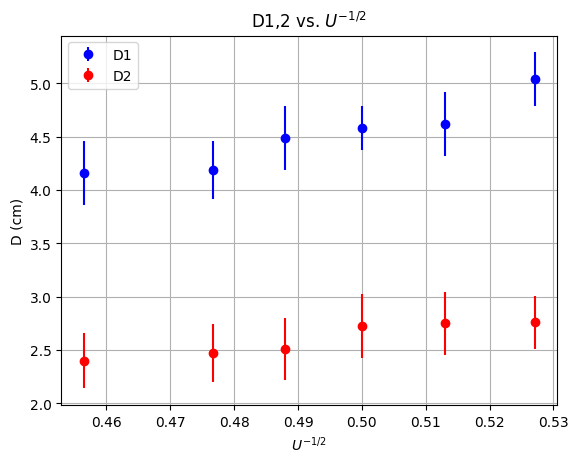

In [183]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
U_kV = np.array([3.6, 4, 3.8, 4.2, 4.4, 4.8])
D1_cm = np.array([5.04, 4.58, 4.62, 4.49, 4.185, 4.16])
inc_D1_cm = np.array([0.25, 0.205, 0.3, 0.3, 0.27, 0.3])
D2_cm = np.array([2.76, 2.72, 2.75, 2.51, 2.47, 2.4])
inc_D2_cm = np.array([0.25, 0.3, 0.295, 0.29, 0.27, 0.26])

# Cálculo de U^{-1/2}
U_inv_sqrt = 1 / np.sqrt(U_kV)

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Tramar D1 contra U^{-1/2} con barras de error
ax.errorbar(U_inv_sqrt, D1_cm, yerr=inc_D1_cm, fmt='o', label='D1', color='blue')

# Tramar D2 contra U^{-1/2} con barras de error
ax.errorbar(U_inv_sqrt, D2_cm, yerr=inc_D2_cm, fmt='o', label='D2', color='red')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('$U^{-1/2}$')
ax.set_ylabel('D (cm)')
ax.set_title('D1,2 vs. $U^{-1/2}$')
ax.legend()

# Mostrar la gráfica
plt.grid()
plt.show()


2. Asumiendo ángulos pequeños:
A partir de la regresión lineal de los datos $(D_{1,2}) vs (U^{-1/2})$, esperamos que la pendiente de la recta sea de la forma $(m = \frac{2Lh}{d\sqrt{2m_{e}e}})$.





Pendiente para D1: 12.034947868047832 cm/kV^(-1/2) ± 2.1193804449041944 cm/kV^(-1/2)
Pendiente para D2: 5.926906264294789 cm/kV^(-1/2) ± 1.0369746357180687 cm/kV^(-1/2)
Pendiente esperada según Ley de Bragg: 2.3462239954690206e+35 cm/kV^(-1/2)


<ipython-input-146-f1869ab4eee6>:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax.plot(U_inv_sqrt, intercept_D1 + slope_D1 * U_inv_sqrt, 'r--', color='blue')
<ipython-input-146-f1869ab4eee6>:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax.plot(U_inv_sqrt, intercept_D2 + slope_D2 * U_inv_sqrt, 'r--', color='red')


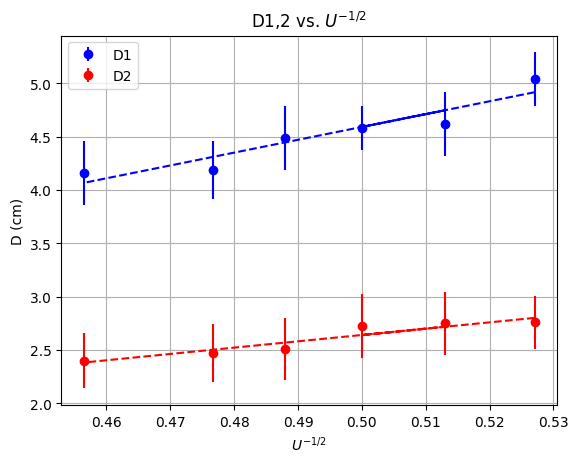

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Datos
U_kV = np.array([3.6, 4, 3.8, 4.2, 4.4, 4.8])
D1_cm = np.array([5.04, 4.58, 4.62, 4.49, 4.185, 4.16])
inc_D1_cm = np.array([0.25, 0.205, 0.3, 0.3, 0.27, 0.3])
D2_cm = np.array([2.76, 2.72, 2.75, 2.51, 2.47, 2.4])
inc_D2_cm = np.array([0.25, 0.3, 0.295, 0.29, 0.27, 0.26])

# Cálculo de U^{-1/2}
U_inv_sqrt = 1 / np.sqrt(U_kV)

# Realizar la regresión lineal para D1 y D2 con barras de error
slope_D1, intercept_D1, r_value_D1, p_value_D1, std_err_D1 = linregress(U_inv_sqrt, D1_cm)
slope_D2, intercept_D2, r_value_D2, p_value_D2, std_err_D2 = linregress(U_inv_sqrt, D2_cm)

# Valores esperados de la pendiente según la Ley de Bragg
h = 1  # Usando el conjunto de índices (h, k, l) = (1, 0, 0)
d_pm = 213  # Distancia interplanar en picómetros
L_cm = 13.5  # Longitud L en centímetros
me = 9.10938356e-31  # Masa del electrón en kg
e = 1.60217663e-19  # Carga del electrón en C
expected_slope = 2 * L_cm * h / (d_pm * 1e-12 * np.sqrt(2 * me * e))

# Imprimir la pendiente y la incertidumbre
print(f"Pendiente para D1: {slope_D1} cm/kV^(-1/2) ± {std_err_D1} cm/kV^(-1/2)")
print(f"Pendiente para D2: {slope_D2} cm/kV^(-1/2) ± {std_err_D2} cm/kV^(-1/2)")
print(f"Pendiente esperada según Ley de Bragg: {expected_slope} cm/kV^(-1/2)")

# Crear una figura y ejes para la gráfica
fig, ax = plt.subplots()

# Graficar D1 vs. U^{-1/2} con la recta de regresión y barras de error
ax.errorbar(U_inv_sqrt, D1_cm, yerr=inc_D1_cm, fmt='o', label='D1', color='blue')
ax.plot(U_inv_sqrt, intercept_D1 + slope_D1 * U_inv_sqrt, 'r--', color='blue')

# Graficar D2 vs. U^{-1/2} con la recta de regresión y barras de error
ax.errorbar(U_inv_sqrt, D2_cm, yerr=inc_D2_cm, fmt='o', label='D2', color='red')
ax.plot(U_inv_sqrt, intercept_D2 + slope_D2 * U_inv_sqrt, 'r--', color='red')

# Etiquetas de los ejes y leyenda
ax.set_xlabel('$U^{-1/2}$')
ax.set_ylabel('D (cm)')
ax.set_title('D1,2 vs. $U^{-1/2}$')
ax.legend()

# Mostrar la gráfica
plt.grid()
plt.show()


Pendiente para D1: 12.034947868047832 cm/kV^(-1/2) ± 2.1193804449041944 cm/kV^(-1/2)
Pendiente para D2: 5.926906264294789 cm/kV^(-1/2) ± 1.0369746357180687 cm/kV^(-1/2)
Pendiente esperada según Ley de Bragg: 2.3462239954690206e+35 cm/kV^(-1/2)


<ipython-input-186-243cc8789e6f>:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax1.plot(U_inv_sqrt, predicted_D1, 'r--', color='blue')
<ipython-input-186-243cc8789e6f>:51: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(U_inv_sqrt, predicted_D2, 'r--', color='red')


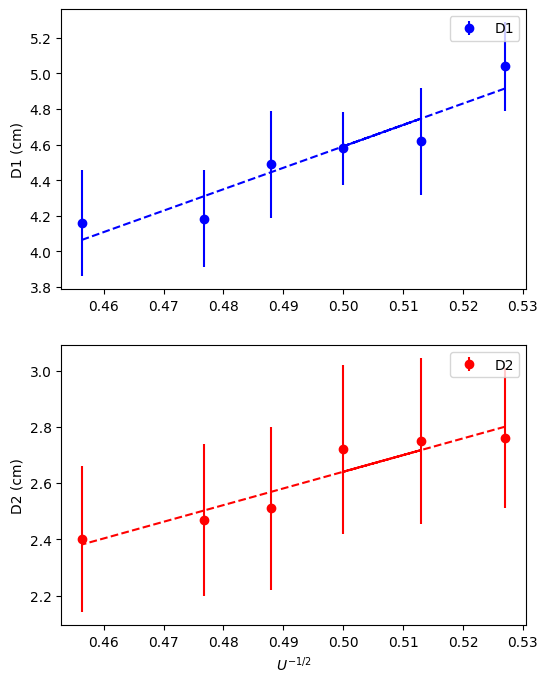

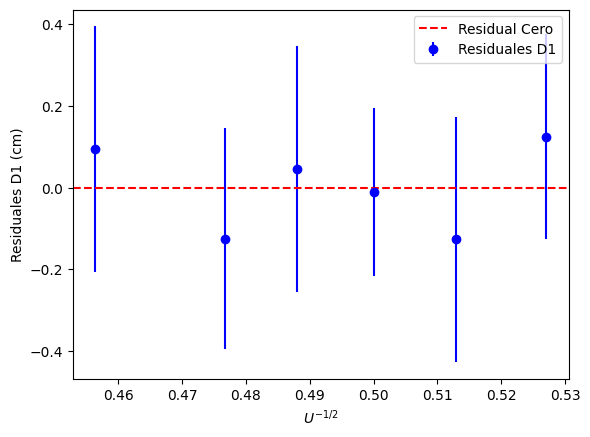

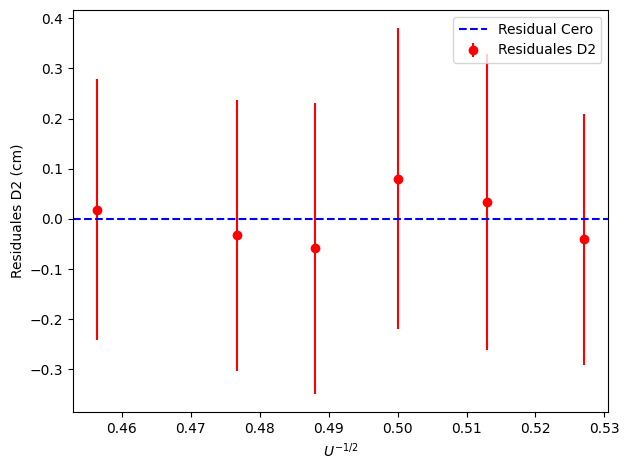

In [186]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Datos
U_kV = np.array([3.6, 4, 3.8, 4.2, 4.4, 4.8])
D1_cm = np.array([5.04, 4.58, 4.62, 4.49, 4.185, 4.16])
inc_D1_cm = np.array([0.25, 0.205, 0.3, 0.3, 0.27, 0.3])
D2_cm = np.array([2.76, 2.72, 2.75, 2.51, 2.47, 2.4])
inc_D2_cm = np.array([0.25, 0.3, 0.295, 0.29, 0.27, 0.26])

# Cálculo de U^{-1/2}
U_inv_sqrt = 1 / np.sqrt(U_kV)

# Realizar la regresión lineal para D1 y D2 con barras de error
slope_D1, intercept_D1, r_value_D1, p_value_D1, std_err_D1 = linregress(U_inv_sqrt, D1_cm)
slope_D2, intercept_D2, r_value_D2, p_value_D2, std_err_D2 = linregress(U_inv_sqrt, D2_cm)

# Valores esperados de la pendiente según la Ley de Bragg
h = 1  # Usando el conjunto de índices (h, k, l) = (1, 0, 0)
d_pm = 213  # Distancia interplanar en picómetros
L_cm = 13.5  # Longitud L en centímetros
me = 9.10938356e-31  # Masa del electrón en kg
e = 1.60217663e-19  # Carga del electrón en C
expected_slope = 2 * L_cm * h / (d_pm * 1e-12 * np.sqrt(2 * me * e))

# Imprimir la pendiente y la incertidumbre
print(f"Pendiente para D1: {slope_D1} cm/kV^(-1/2) ± {std_err_D1} cm/kV^(-1/2)")
print(f"Pendiente para D2: {slope_D2} cm/kV^(-1/2) ± {std_err_D2} cm/kV^(-1/2)")
print(f"Pendiente esperada según Ley de Bragg: {expected_slope} cm/kV^(-1/2)")

# Calcular los valores predichos por la regresión lineal
predicted_D1 = intercept_D1 + slope_D1 * U_inv_sqrt
predicted_D2 = intercept_D2 + slope_D2 * U_inv_sqrt

# Calcular los residuales
residuals_D1 = D1_cm - predicted_D1
residuals_D2 = D2_cm - predicted_D2

# Crear una figura y ejes para la gráfica
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))

# Graficar D1 vs. U^{-1/2} con la recta de regresión y barras de error
ax1.errorbar(U_inv_sqrt, D1_cm, yerr=inc_D1_cm, fmt='o', label='D1', color='blue')
ax1.plot(U_inv_sqrt, predicted_D1, 'r--', color='blue')
ax1.set_ylabel('D1 (cm)')
ax1.legend()

# Graficar D2 vs. U^{-1/2} con la recta de regresión y barras de error
ax2.errorbar(U_inv_sqrt, D2_cm, yerr=inc_D2_cm, fmt='o', label='D2', color='red')
ax2.plot(U_inv_sqrt, predicted_D2, 'r--', color='red')
ax2.set_xlabel('$U^{-1/2}$')
ax2.set_ylabel('D2 (cm)')
ax2.legend()

# Mostrar la gráfica de residuales para D1
fig_res, ax_res = plt.subplots()
ax_res.errorbar(U_inv_sqrt, residuals_D1, yerr=inc_D1_cm, fmt='o', color='blue', label='Residuales D1')
ax_res.axhline(0, color='red', linestyle='--', label='Residual Cero')
ax_res.set_xlabel('$U^{-1/2}$')
ax_res.set_ylabel('Residuales D1 (cm)')
ax_res.legend()

# Mostrar la gráfica de residuales para D2
fig_res2, ax_res2 = plt.subplots()
ax_res2.errorbar(U_inv_sqrt, residuals_D2, yerr=inc_D2_cm, fmt='o', color='red', label='Residuales D2')
ax_res2.axhline(0, color='blue', linestyle='--', label='Residual Cero')
ax_res2.set_xlabel('$U^{-1/2}$')
ax_res2.set_ylabel('Residuales D2 (cm)')
ax_res2.legend()

# Ajustar el espaciado de las subfiguras
plt.tight_layout()

# Mostrar las gráficas
plt.show()


3. Para calcular las distancias \(d_1\) y \(d_2\) con la pendiente de la regresión lineal y suponiendo $(\lambda_{\text{Bragg}} = \lambda_{\text{de Broglie}}$), podemos usar la siguiente relación de la Ley de Bragg:

$
n \lambda_{\text{Bragg}} = 2d \sin\left(\frac{1}{2}\arctan\left(\frac{D}{2L}\right)\right)
$

Dado que asumimos $(\lambda_{\text{Bragg}} = \lambda_{\text{de Broglie}})$, podemos escribir:

$
n \lambda_{\text{de Broglie}} = 2d \sin\left(\frac{1}{2}\arctan\left(\frac{D}{2L}\right)\right)$


Entonces, para \(d_1\):

$\
n \lambda_{\text{de Broglie}} = 2d_1 \sin\left(\frac{1}{2}\arctan\left(\frac{D_1}{2L}\right)\right)
\$

Y para \(d_2\):

$\
n \lambda_{\text{de Broglie}} = 2d_2 \sin\left(\frac{1}{2}\arctan\left(\frac{D_2}{2L}\right)\right)
\$

Dado que estamos haciendo la aproximación de ángulos muy pequeños, podemos usar $(\sin(\theta) \approx \theta)$ para pequeños valores de $(\theta)$. Esto nos lleva a:

$\
n \lambda_{\text{de Broglie}} = d_1 \arctan\left(\frac{D_1}{2L}\right)
\$

Y para \(d_2\):

$\
n \lambda_{\text{de Broglie}} = d_2 \arctan\left(\frac{D_2}{2L}\right)
\$

Finalmente, podemos despejar \(d_1\) y \(d_2\):

$\
d_1 = \frac{n \lambda_{\text{de Broglie}}}{\arctan\left(\frac{D_1}{2L}\right)}
\$

$\
d_2 = \frac{n \lambda_{\text{de Broglie}}}{\arctan\left(\frac{D_2}{2L}\right)}
\$




In [ ]:
import numpy as np

# Datos
n = 1  # Orden de difracción (puedes cambiarlo si es necesario)
lambda_deBroglie = 6.62607004e-34 / (np.sqrt(2 * 9.10938356e-31 * 1.60217663e-19 * 1000))  # Longitud de onda de Broglie en metros
D1_cm = np.array([5.04, 4.58, 4.62, 4.49, 4.185, 4.16])
D2_cm = np.array([2.76, 2.72, 2.75, 2.51, 2.47, 2.4])
L_cm = 13.5  # Longitud L en centímetros

# Cálculo de d1 y d2
d1 = n * lambda_deBroglie / np.arctan(D1_cm / (2 * L_cm))
d2 = n * lambda_deBroglie / np.arctan(D2_cm / (2 * L_cm))

# Imprimir resultados
print(f"d1 = {d1} metros")
print(f"d2 = {d2} metros")

# Convertir a nanómetros para comparación con la literatura
d1_pm = d1 * 1e12
d2_pm = d2 * 1e12
print(f"d1 = {d1_pm} pm")
print(f"d2 = {d2_pm} pm")


d1 = [2.10157181e-10 2.30809708e-10 2.28848917e-10 2.35350417e-10
 2.52203974e-10 2.53695911e-10] metros
d2 = [3.80716687e-10 3.86277086e-10 3.82091571e-10 4.18386622e-10
 4.25123674e-10 4.37455398e-10] metros
d1 = [210.15718111 230.80970849 228.84891713 235.35041704 252.20397436
 253.69591141] pm
d2 = [380.71668714 386.27708636 382.09157084 418.38662229 425.12367381
 437.4553976 ] pm


4. Para demostrar que la constante de Planck \(h\) se puede escribir en función de las distancias \(d_1\) y \(d_2\), el voltaje \(V\), el orden de difracción \(n\), el ángulo de incidencia $(\theta)$, el diámetro del patrón de difracción \(D\) y la longitud \(2L\), podemos comenzar desde la relación dada:

$\
\lambda_{\text{Bragg}} = \lambda_{\text{de Broglie}}
\$

Dado que $(\lambda_{\text{Bragg}} = \frac{2d}{n} \sin\left(\frac{1}{2} \arctan\left(\frac{D}{2L}\right)\right))$ y $(\lambda_{\text{de Broglie}} = \frac{h}{\sqrt{2m_e e V}})$, podemos igualar estas dos expresiones:

$\
\frac{2d}{n} \sin\left(\frac{1}{2} \arctan\left(\frac{D}{2L}\right)\right) = \frac{h}{\sqrt{2m_e e V}}
\$

Ahora, despejaremos \(h\) en términos de las demás variables:

$\
h = \frac{2d}{n \sin\left(\frac{1}{2} \arctan\left(\frac{D}{2L}\right)\right)} \sqrt{2m_e e V}
\$

Esta es la expresión que relaciona la constante de Planck \(h\) con las distancias \(d_1\) y \(d_2\), el voltaje (\(V\)), el orden de difracción \(n\), el ángulo de incidencia \(\theta\), el diámetro del patrón de difracción \(D\) y la longitud \(2L\).




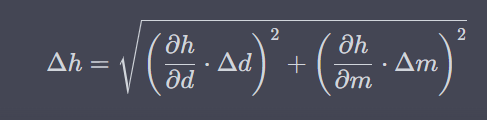

In [185]:
import numpy as np

# Datos
slope_D1 = slope_D1/10  # Pendiente para D1 (reemplaza con el valor real)
inc_slope_D1 = std_err_D1/100  # Incertidumbre en la pendiente para D1 (reemplaza con el valor real)
d1_m = 1e-10  # Distancia d1 en metros (reemplaza con el valor real)
L_m = 0.135  # Longitud L en metros (reemplaza con el valor real)

# Cálculo de h
h = (slope_D1 * d1_m * np.sqrt(2 * 9.10938356e-31 * 1.60217663e-19)) / (2 * L_m)

# Cálculo de la incertidumbre en h
delta_h = np.sqrt((d1_m * np.sqrt(2 * 9.10938356e-31 * 1.60217663e-19) / (2 * L_m) * inc_slope_D1) ** 2)

# Imprimir resultados
print(f"Constante de Planck (h) = {h} J*s")
print(f"Incertidumbre en h = {delta_h} J*s")


Constante de Planck (h) = 2.4012212081119675e-37 J*s
Incertidumbre en h = 4.2409177269681074e-36 J*s
